In [39]:
import pandas as pd  

Sdnn=[]
Rmssd=[]


chf10m
qrs peaks indices
[  92  217  341  458  591  715  838  963 1087 1212 1336 1461 1586 1711
 1835 1960 2085 2210 2327 2460]
noise peaks indices
[]
Heart Attack indices
[]
{'mean_nni': 124.63157894736842, 'sdnn': 3.8182387783402247, 'sdsd': 6.300107778815483, 'nni_50': 0, 'pnni_50': 0.0, 'nni_20': 0, 'pnni_20': 0.0, 'rmssd': 6.315765107165472, 'median_nni': 125.0, 'range_nni': 16, 'cvsd': 0.050675480167290524, 'cvnni': 0.03063620641404741, 'mean_hr': 481.84507271038046, 'max_hr': 512.8205128205128, 'min_hr': 451.1278195488722, 'std_hr': 14.313656041907207}
RMSSD : 6.315765107165472 ms
        Std_HR : 14.313656041907207 beats/min
        Min_HR : 451.1278195488722 beats/min
        Max_HR : 512.8205128205128 beats/min
        NNXX : 19
        SDNN : 3.7164007250336275 ms
        PNNX : 95.0 %
        


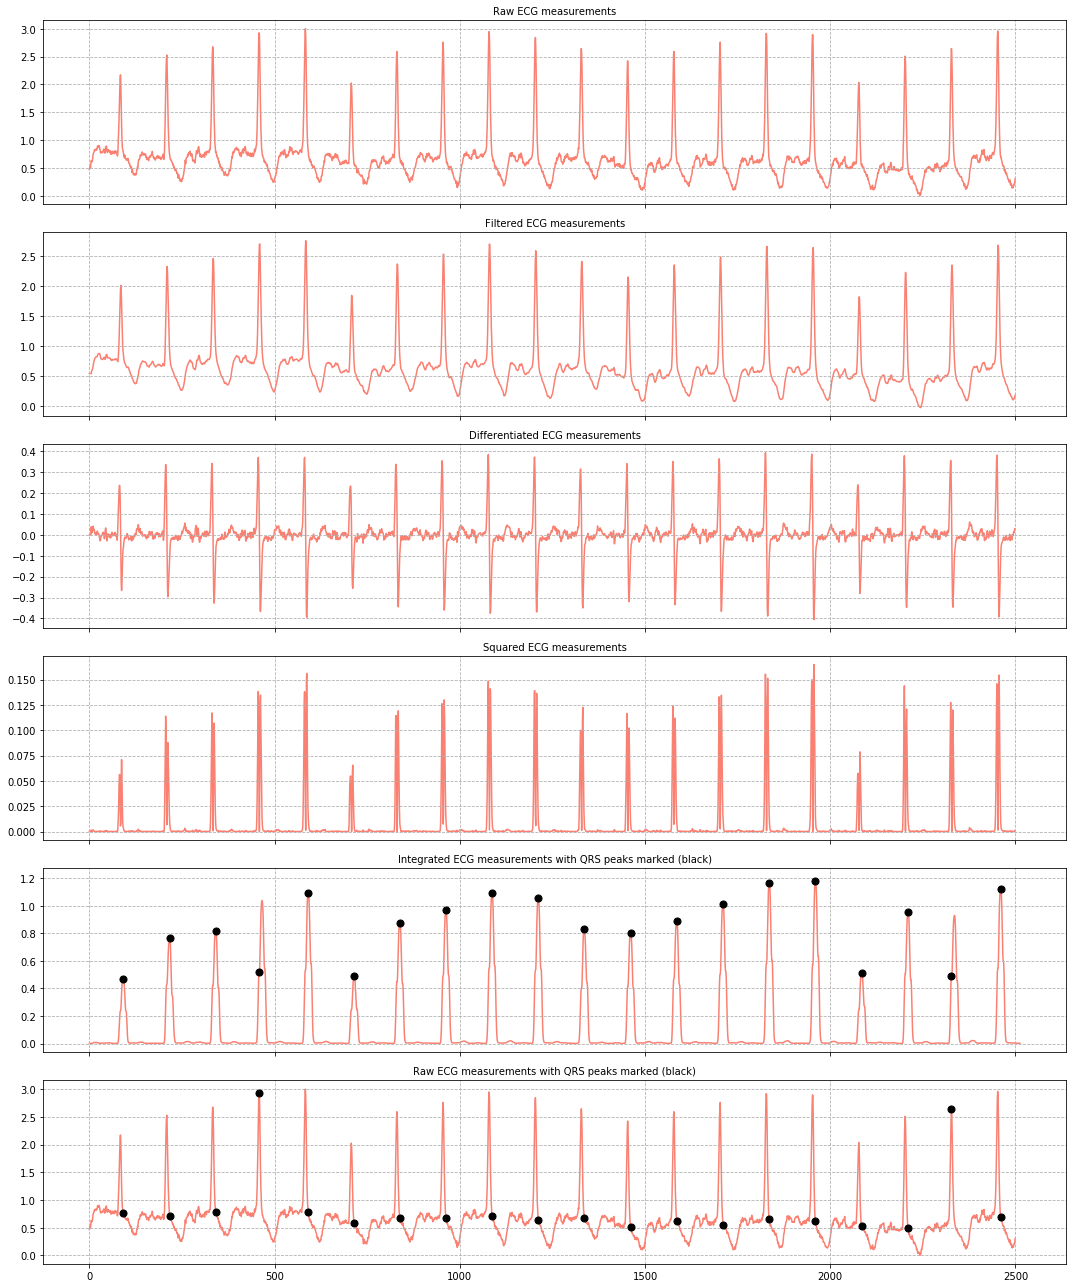

chf11m
qrs peaks indices
[ 128  265  402  539  676  815  954 1090 1227 1363 1501 1640 1773 1907
 2041 2177 2313 2450]
noise peaks indices
[]
Heart Attack indices
[]
{'mean_nni': 136.58823529411765, 'sdnn': 1.7341721198244628, 'sdsd': 1.9685019685029528, 'nni_50': 0, 'pnni_50': 0.0, 'nni_20': 0, 'pnni_20': 0.0, 'rmssd': 1.9685019685029528, 'median_nni': 137.0, 'range_nni': 6, 'cvsd': 0.014411943783182685, 'cvnni': 0.01269635057580356, 'mean_hr': 439.3435266889128, 'max_hr': 451.1278195488722, 'min_hr': 431.6546762589928, 'std_hr': 5.44344048519357}
RMSSD : 1.9685019685029528 ms
        Std_HR : 5.44344048519357 beats/min
        Min_HR : 431.6546762589928 beats/min
        Max_HR : 451.1278195488722 beats/min
        NNXX : 17
        SDNN : 1.6823940760088345 ms
        PNNX : 94.44444444444444 %
        


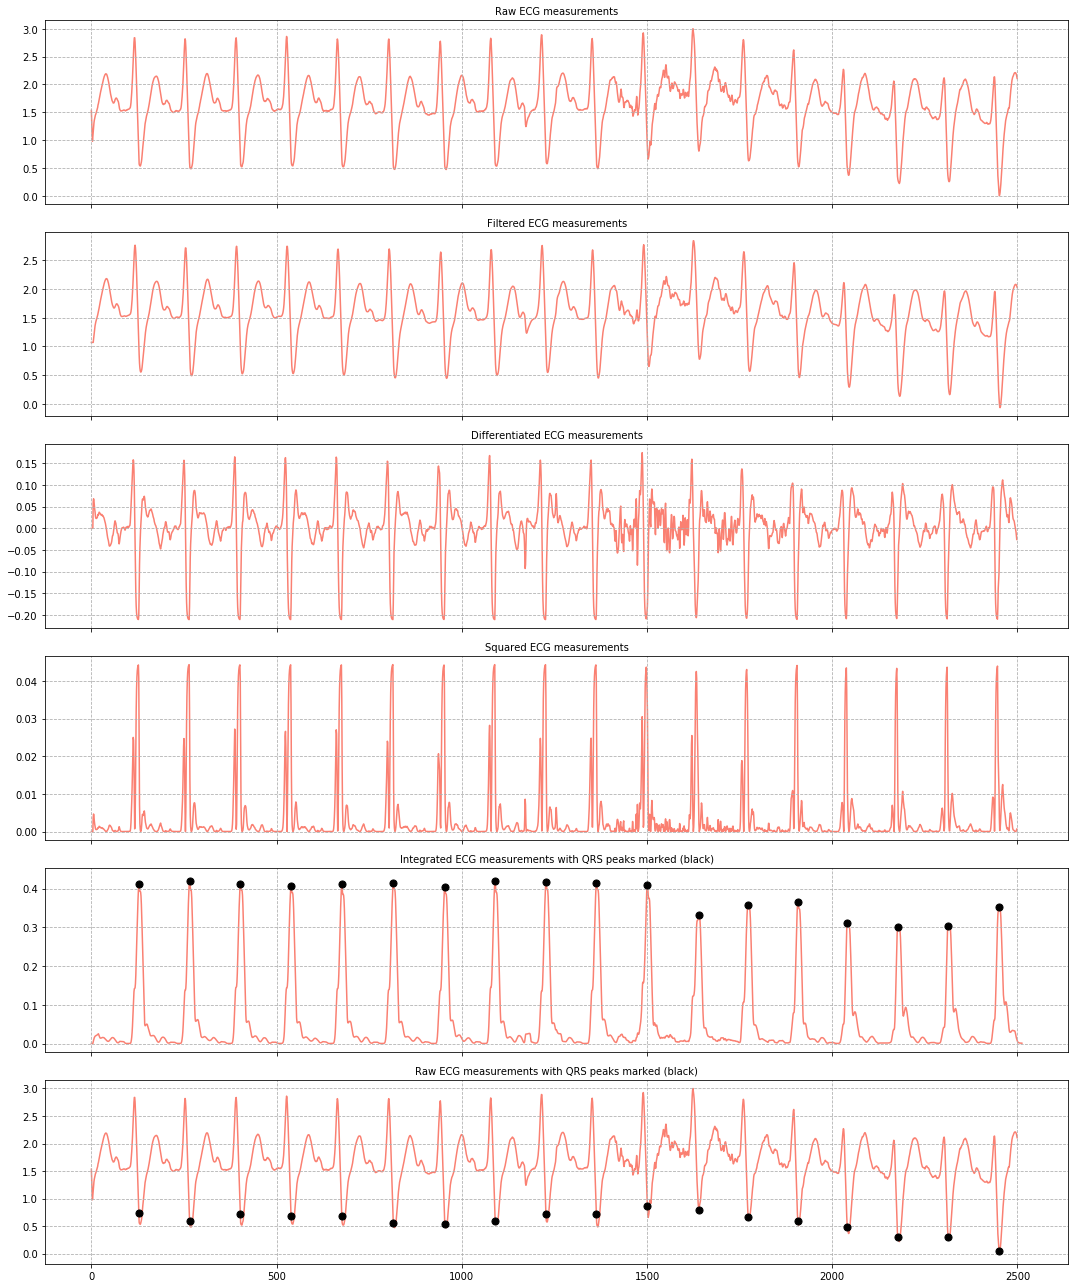

chf12m
qrs peaks indices
[]
noise peaks indices
[]
Heart Attack indices


ValueError: zero-size array to reduction operation minimum which has no identity

In [57]:

import numpy as np
import matplotlib.pyplot as plt 
from time import gmtime, strftime 
from scipy.signal import butter, lfilter 
from hrvanalysis import get_time_domain_features 
import scipy.io 
import numpy as np

LOG_DIR = "logs/" 
PLOT_DIR = "plots/"

class QRSDetectorOffline(object):
    """ Python Offline ECG QRS Detector based on the Pan-Tomkins algorithm.
    Michal Sznajder (Jagiellonian University) - technical contact (msznajder@gmail.com)
    Marta Lukowska (Jagiellonian University)
    
    
    The module is offline Python implementation of QRS complex detection in the ECG signal based
    on the Pan-Tomkins algorithm: Pan J, Tompkins W.J., A real-time QRS detection algorithm,
    IEEE Transactions on Biomedical Engineering, Vol. BME-32, No. 3, March 1985, pp. 230-236.
    
    The QRS complex corresponds to the depolarization of the right and left ventricles of the human heart. It is the most visually obvious part of the ECG signal. QRS complex detection is essential for time-domain ECG signal analyses, namely heart rate variability. It makes it possible to compute inter-beat interval (RR interval) values that correspond to the time between two consecutive R peaks. Thus, a QRS complex detector is an ECG-based heart contraction detector.
    
    Offline version detects QRS complexes in a pre-recorded ECG signal dataset (e.g. stored in .csv format).
    
    This implementation of a QRS Complex Detector is by no means a certified medical tool and should not be used in health monitoring. It was created and used for experimental purposes in psychophysiology and psychology.
    
    You can find more information in module documentation:
    https://github.com/c-labpl/qrs_detector
    
    If you use these modules in a research project, please consider citing it:
    https://zenodo.org/record/583770
    
    If you use these modules in any other project, please refer to MIT open-source license.
    
    
    MIT License
    
    Copyright (c) 2017 Michal Sznajder, Marta Lukowska
    
    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:
    
    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.
    
    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
    OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
    SOFTWARE.
    """

    def __init__(self, ecg_data_path, verbose=True, log_data=False, plot_data=False, show_plot=False):
        """
        QRSDetectorOffline class initialisation method.
        :param string ecg_data_path: path to the ECG dataset
        :param bool verbose: flag for printing the results
        :param bool log_data: flag for logging the results
        :param bool plot_data: flag for plotting the results to a file
        :param bool show_plot: flag for showing generated results plot - will not show anything if plot is not generated
        """
        # Configuration parameters.
        self.ecg_data_path = ecg_data_path
    
        self.signal_frequency = 150  # Set ECG device frequency in samples per second here.
    
        self.filter_lowcut = 0.0
        self.filter_highcut = 15.0
        self.filter_order = 1
    
        self.integration_window = 15  # Change proportionally when adjusting frequency (in samples).
    
        self.findpeaks_limit = 0.3
        self.find_attackpeaks_limit = 0.05
        self.findpeaks_spacing = 1  # Change proportionally when adjusting frequency (in samples).
    
        self.refractory_period = 70  # Change proportionally when adjusting frequency (in samples).
        self.qrs_peak_filtering_factor = 0.125
        self.noise_peak_filtering_factor = 0.125
        self.qrs_noise_diff_weight = 0.25
    
        # Loaded ECG data.
        self.ecg_data_raw = None
    
        # Measured and calculated values.
        self.filtered_ecg_measurements = None
        self.differentiated_ecg_measurements = None
        self.squared_ecg_measurements = None
        self.integrated_ecg_measurements = None
        self.detected_peaks_indices = None
        self.detected_heart_attack = None  # Heart Attack Detection
        self.detected_heart_attack_values = None
        self.detected_peaks_values = None
    
        self.qrs_peak_value = 0.0
        self.noise_peak_value = 0.0
        self.threshold_value = 0.0
    
        # Detection results.
        self.qrs_peaks_indices = np.array([], dtype=int)
        self.heart_disease_indices = np.array([], dtype=int)
        self.heart_attack_indices = np.array([], dtype=int)
        self.qrs_down_peaks_indices = np.array([], dtype=int)
        self.noise_peaks_indices = np.array([], dtype=int)
    
        # Final ECG data and QRS detection results array - samples with detected QRS are marked with 1 value.
        self.ecg_data_detected = None
    
        # Run whole detector flow.
        self.load_ecg_data()
        self.detect_peaks()
        self.detect_qrs()
    
        if verbose:
            self.print_detection_data()
    
        if log_data:
            self.log_path = "%sQRS_offline_log_%s_%s.csv" % (
            LOG_DIR, self.ecg_data_path.split('/')[-1].split('\\')[-1].split('.')[0],
            strftime("%Y_%m_%d_%H_%M_%S", gmtime()))
            self.log_detection_data()
    
        if plot_data:
            self.plot_path = "%sQRS_offline_plot_%s_%s.png" % (
            PLOT_DIR, self.ecg_data_path.split('/')[-1].split('\\')[-1].split('.')[0],
            strftime("%Y_%m_%d_%H_%M_%S", gmtime()))
            self.plot_detection_data(show_plot=show_plot)
    
    """Loading ECG measurements data methods."""
    
    # def load_ecg_data(self):
    #     """
    #     Method loading ECG data set from a file.
    #     """
    #     self.ecg_data_raw = np.loadtxt(self.ecg_data_path, skiprows=1, delimiter=',')

    def load_ecg_data(self):
        mat = scipy.io.loadmat(self.ecg_data_path)
        print(self.ecg_data_path.split('/')[-1].split('\\')[-1].split('.')[0])
        data = mat['val'][0][:].astype('float32') + abs(min(mat['val'][0])).astype('float32')
        minimum = min(data)
        maximum = max(data)
        diff = (maximum - minimum) / 2
        data = (data - minimum) / diff
        data = (data) * 1.5
        data = np.array([data]).astype('float32')
        final = []
        for idx, i in enumerate(data[0]):
            final.append([idx, i])
        final = np.array(final)
        # print(final)
        self.ecg_data_raw = final
        
      
    
    """ECG measurements data processing methods."""
    
    def detect_peaks(self):
        """
        Method responsible for extracting peaks from loaded ECG measurements data through measurements processing.
        """
        # Extract measurements from loaded ECG data.
        ecg_measurements = self.ecg_data_raw[:, 1]
    
        # Measurements filtering - 0-15 Hz band pass filter.
        self.filtered_ecg_measurements = self.bandpass_filter(ecg_measurements, lowcut=self.filter_lowcut,
                                                              highcut=self.filter_highcut,
                                                              signal_freq=self.signal_frequency,
                                                              filter_order=self.filter_order)
        self.filtered_ecg_measurements[:5] = self.filtered_ecg_measurements[5]
        # print(self.filtered_ecg_measurements, self.filtered_ecg_measurements.shape)
    
        # Derivative - provides QRS slope information.
        self.differentiated_ecg_measurements = np.ediff1d(self.filtered_ecg_measurements)
    
        # Squaring - intensifies values received in derivative.
        self.squared_ecg_measurements = self.differentiated_ecg_measurements ** 2
    
        # Moving-window integration.
        self.integrated_ecg_measurements = np.convolve(self.squared_ecg_measurements, np.ones(self.integration_window))
    
        # Fiducial mark - peak detection on integrated measurements.
        self.detected_peaks_indices, self.detected_heart_attack = self.findpeaks(data=self.integrated_ecg_measurements,
                                                                                 limit=self.findpeaks_limit,
                                                                                 spacing=self.findpeaks_spacing)
    
        self.detected_peaks_values = self.integrated_ecg_measurements[self.detected_peaks_indices]
        self.detected_heart_attack_values = self.integrated_ecg_measurements[self.detected_heart_attack]
    
    """QRS detection methods."""
    
    def detect_qrs(self):
        """
        Method responsible for classifying detected ECG measurements peaks either as noise or as QRS complex (heart beat).
        """
        for detected_peak_index, detected_peaks_value in zip(self.detected_peaks_indices, self.detected_peaks_values):
    
            try:
                last_qrs_index = self.qrs_peaks_indices[-1]
            except IndexError:
                last_qrs_index = 0
    
            # After a valid QRS complex detection, there is a 200 ms refractory period before next one can be detected.
            if detected_peak_index - last_qrs_index > self.refractory_period or not self.qrs_peaks_indices.size:
                # Peak must be classified either as a noise peak or a QRS peak.
                # To be classified as a QRS peak it must exceed dynamically set threshold value.
                if detected_peaks_value > self.threshold_value:
                    self.qrs_peaks_indices = np.append(self.qrs_peaks_indices, detected_peak_index)
    
                    # Adjust QRS peak value used later for setting QRS-noise threshold.
                    self.qrs_peak_value = self.qrs_peak_filtering_factor * detected_peaks_value + \
                                          (1 - self.qrs_peak_filtering_factor) * self.qrs_peak_value
                else:
                    self.noise_peaks_indices = np.append(self.noise_peaks_indices, detected_peak_index)
    
                    # Adjust noise peak value used later for setting QRS-noise threshold.
                    self.noise_peak_value = self.noise_peak_filtering_factor * detected_peaks_value + \
                                            (1 - self.noise_peak_filtering_factor) * self.noise_peak_value
    
                # Adjust QRS-noise threshold value based on previously detected QRS or noise peaks value.
                self.threshold_value = self.noise_peak_value + \
                                       self.qrs_noise_diff_weight * (self.qrs_peak_value - self.noise_peak_value)
    
        # Create array containing both input ECG measurements data and QRS detection indication column.
        # We mark QRS detection with '1' flag in 'qrs_detected' log column ('0' otherwise).
        try:
            self.qrs_down_peaks_indices = [indice - np.argmin(self.ecg_data_raw[indice - 20:indice]) for indice in
                                           self.qrs_peaks_indices]
        except:
            self.qrs_down_peaks_indices = []
        # print(self.qrs_down_peaks_indices)
        measurement_qrs_detection_flag = np.zeros([len(self.ecg_data_raw), 1])
        measurement_qrs_detection_flag[self.qrs_peaks_indices] = 1
        # print(self.ecg_data_raw.shape,measurement_qrs_detection_flag.shape)
        self.ecg_data_detected = np.append(self.ecg_data_raw, measurement_qrs_detection_flag, 1)
        """ This is for heart attack detection"""
        for detected_attack_index, detected_attack_value in zip(self.detected_heart_attack,
                                                                self.detected_heart_attack_values):
            self.heart_disease_indices = np.append(self.heart_disease_indices, detected_attack_index)
    
    """Results reporting methods."""
    
    def print_detection_data(self):
        """
        Method responsible for printing the results.
        """
        print("qrs peaks indices")
        print(self.qrs_peaks_indices)
        print("noise peaks indices")
        print(self.noise_peaks_indices)
        print("Heart Attack indices")
    
        ln = len(self.qrs_peaks_indices)
        RR_interval = [self.qrs_peaks_indices[i + 1] - self.qrs_peaks_indices[i] for i in range(ln - 1)]
        avrg = np.average(np.array(RR_interval))
    
        HRV_analysis = []
        HRV_a = np.sqrt(np.mean(np.square(np.diff(self.qrs_peaks_indices))))
        for idx, x in enumerate(RR_interval):
            if x < (HRV_a * 1.5):
                HRV_analysis.append(0)
            else:
                number_of_missing_peak = int(round(x/HRV_a))
                diff = (self.qrs_peaks_indices[idx + 1] - self.qrs_peaks_indices[idx])
                # print(diff)
                for i in range(1,number_of_missing_peak):
                    y = self.qrs_peaks_indices[idx] + int(round(diff * i / number_of_missing_peak))
                    # print(self.integrated_ecg_measurements[y])
                    if float(self.integrated_ecg_measurements[y]) <= float(self.find_attackpeaks_limit):
                        self.heart_attack_indices = np.append(self.heart_attack_indices, y)
                        HRV_analysis.append(1)
                    else:
                        self.qrs_peaks_indices = np.append(self.qrs_peaks_indices, y)
                        HRV_analysis.append(0)
                        continue
    
        # print(RR_interval)
        r = np.array(RR_interval)
        RMSSD = np.sqrt(np.mean(np.square(np.diff(r))))
        sdnn = np.std(r)
        mean_hr = round(60 * 2500 / np.mean(r))
        hr = 60 * 1000 / r
        std_hr = np.std(hr)
        min_hr = np.min(hr)
        max_hr = np.max(hr)
        nnxx = np.sum(np.abs(np.diff(self.qrs_peaks_indices)) > 50) * 1
        pnnx = 100 * nnxx / len(self.qrs_peaks_indices)
        print(self.heart_attack_indices)
        # print('HRVA : ', HRV_analysis)
        time_domain_features = get_time_domain_features(RR_interval)
        print(time_domain_features)
        # print('RMSSD : ', RMSSD, 'SDNN : ', sdnn, 'Mean_HR : ', mean_hr, "Std_HR : ", std_hr)
        # print("Min_HR : ", min_hr, 'Max_HR : ', max_hr, "NNXX : ", nnxx, "PNNX : ", pnnx)
        
        Rmssd.append(RMSSD)
        Sdnn.append(sdnn)
        print('''RMSSD : %s ms
        Std_HR : %s beats/min
        Min_HR : %s beats/min
        Max_HR : %s beats/min
        NNXX : %s
        SDNN : %s ms
        PNNX : %s %%
        ''' % (RMSSD, std_hr, min_hr, max_hr, nnxx, sdnn, pnnx))
    
    def log_detection_data(self):
        """
        Method responsible for logging measured ECG and detection results to a file.
        """
        with open(self.log_path, "wb") as fin:
            fin.write(b"timestamp,ecg_measurement,qrs_detected\n")
            np.savetxt(fin, self.ecg_data_detected, delimiter=",")
    
    def plot_detection_data(self, show_plot=False):
        """
        Method responsible for plotting detection results.
        :param bool show_plot: flag for plotting the results and showing plot
        """
    
        def plot_data(axis, data, title='', fontsize=10):
            axis.set_title(title, fontsize=fontsize)
            axis.grid(which='both', axis='both', linestyle='--')
            axis.plot(data, color="salmon", zorder=1)
    
        def plot_points(axis, values, indices, color):
            axis.scatter(x=indices, y=values[indices], c=color, s=50, zorder=2)
    
        plt.close('all')
        fig, axarr = plt.subplots(6, sharex=True, figsize=(15, 18))
    
        plot_data(axis=axarr[0], data=self.ecg_data_raw[:, 1], title='Raw ECG measurements')
        plot_data(axis=axarr[1], data=self.filtered_ecg_measurements, title='Filtered ECG measurements')
        plot_data(axis=axarr[2], data=self.differentiated_ecg_measurements, title='Differentiated ECG measurements')
        plot_data(axis=axarr[3], data=self.squared_ecg_measurements, title='Squared ECG measurements')
        plot_data(axis=axarr[4], data=self.integrated_ecg_measurements,
                  title='Integrated ECG measurements with QRS peaks marked (black)')
        plot_points(axis=axarr[4], values=self.integrated_ecg_measurements, indices=self.qrs_peaks_indices,
                    color='black')
        # plot_points(axis=axarr[4], values=self.integrated_ecg_measurements, indices=self.heart_disease_indices, color='g')
        plot_points(axis=axarr[4], values=self.integrated_ecg_measurements, indices=self.heart_attack_indices,
                    color='r')
        plot_data(axis=axarr[5], data=self.ecg_data_detected[:, 1],
                  title='Raw ECG measurements with QRS peaks marked (black)')
        plot_points(axis=axarr[5], values=self.ecg_data_detected[:, 1], indices=self.qrs_peaks_indices, color='black')
    
        plt.tight_layout()
        fig.savefig(self.plot_path)
    
        if show_plot:
            plt.show()
    
        plt.close()
    
    """Tools methods."""
    
    def bandpass_filter(self, data, lowcut, highcut, signal_freq, filter_order):
        """
        Method responsible for creating and applying Butterworth filter.
        :param deque data: raw data
        :param float lowcut: filter lowcut frequency value
        :param float highcut: filter highcut frequency value
        :param int signal_freq: signal frequency in samples per second (Hz)
        :param int filter_order: filter order
        :return array: filtered data
        """
        nyquist_freq = 0.5 * signal_freq
        low = lowcut / nyquist_freq
        high = highcut / nyquist_freq
        if low >= 1.0:
            low = 0.99999
        elif low <= 0:
            low = 0.00001
        if high >= 1.0:
            high = 0.99999
        elif high <= 0:
            high = 0.00001
        b, a = butter(filter_order, [low, high], btype="band")
        y = lfilter(b, a, data)
        return y
    
    def findpeaks(self, data, spacing=1, limit=None):
        """
        Janko Slavic peak detection algorithm and implementation.
        https://github.com/jankoslavic/py-tools/tree/master/findpeaks
        Finds peaks in `data` which are of `spacing` width and >=`limit`.
        :param ndarray data: data
        :param float spacing: minimum spacing to the next peak (should be 1 or more)
        :param float limit: peaks should have value greater or equal
        :return array: detected peaks indexes array
        """
        len = data.size
        x = np.zeros(len + 2 * spacing)
        x[:spacing] = data[0] - 1.e-6
        x[-spacing:] = data[-1] - 1.e-6
        x[spacing:spacing + len] = data
        peak_candidate = np.zeros(len)
        peak_candidate[:] = True
        for s in range(spacing):
            start = spacing - s - 1
            h_b = x[start: start + len]  # before
            start = spacing
            h_c = x[start: start + len]  # central
            start = spacing + s + 1
            h_a = x[start: start + len]  # after
            peak_candidate = np.logical_and(peak_candidate, np.logical_and(h_c > h_b, h_c > h_a))
    
        ind = np.argwhere(peak_candidate)
        ind = ind.reshape(ind.size)
        missed = np.argwhere(peak_candidate)
        missed = ind.reshape(missed.size)
        if limit is not None:
            ind = ind[data[ind] > limit]
            missed = missed[data[missed] <= limit]
            missed = missed[data[missed] > 0.15]
        return ind, missed

if __name__ == "__main__": 
    i=10
    while(i<16):
        qrs_detector = QRSDetectorOffline(ecg_data_path="chf"+str(i)+"m.mat", verbose=True, log_data=True, plot_data=True, show_plot=True) 
        i=i+1
        # qrs_detector = QRSDetectorOffline(ecg_data_path="16265m.mat", verbose=True, log_data=True, plot_data=True, show_plot=True)import pandas as pd  

In [58]:
print(Sdnn)
print(Rmssd)

[4.405678154382138, 14.95088254548503, 1.9595917942265422, 179.06602134408413, 0.8921029934178295, 686.5, 4.197773430659153, 4.955804677345546, 34.91994192077072, 3.7164007250336275, 1.6823940760088345, 4.405678154382138, 14.95088254548503, 1.9595917942265422, 179.06602134408413, 0.8921029934178295, 686.5, 4.197773430659153, 4.955804677345546, 34.91994192077072, 3.7164007250336275, 1.6823940760088345]
[7.280109889280518, 26.416985877596687, 3.4318767136623336, 283.3223527283994, 1.346291201783626, 1373.0, 6.794605703546503, 8.048464311766423, 52.06086181896467, 6.315765107165472, 1.9685019685029528, 7.280109889280518, 26.416985877596687, 3.4318767136623336, 283.3223527283994, 1.346291201783626, 1373.0, 6.794605703546503, 8.048464311766423, 52.06086181896467, 6.315765107165472, 1.9685019685029528]


In [59]:
i=0
Targets=[]
while(i<len(Sdnn)):
    
    if((Rmssd[i]>=19 and Rmssd[i]<=75) and (Sdnn[i]>=32 and Sdnn[i]<=93)):
        Targets.append("Normal");
    else:
        Targets.append("Heart Failure");
    i=i+1

In [60]:
print(Targets)

['Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Normal', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Heart Failure', 'Normal', 'Heart Failure', 'Heart Failure']


In [61]:
dict = {'SDNN': Sdnn, 'RMSSD': Rmssd, 'Result': Targets} 

In [62]:
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv(r'.\Data.csv', index=False) 

In [63]:
from sklearn.model_selection import train_test_split